<a href="https://colab.research.google.com/github/meltemtugran/courses-notes/blob/main/vahitk_udemy_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pivot tablo nasıl yazılır 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('heart.csv')

data.head()

FileNotFoundError: ignored

In [ ]:
data.pivot_table("target",index="age",columns="cp")

sürekli değşkeni yani nümerik değerleri kategorik değişkenler nasıl böleriz:

In [ ]:
age=pd.cut(data["age"],[0,18,90])
age.head(10)

In [ ]:
data.pivot_table("target",["sex",age],"cp")

#bölüm 6: keşifçi veri analzi ve görselleştrme 

In [ ]:
df = pd.read_csv('heart.csv')


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#eksik gözlem var mı?
df.isnull().values.any()

In [ ]:
#veri tesinde nerde kaç tane nan değr var?
df.isnull().sum()

varsayalım ki cp sütünda boş değerler var biz de onu doldurmka için boş yerlere 0 yazmak istiyoruz.Bu kodu çalıştır:



In [ ]:
#df["cp"].fillna(0, inplace=True)

In [ ]:
# 0 ile değil cp nin  ortalama değeri ile doldurulsun çünkü 0 dersek çok şey değişir:
#df["cp"].fillna(df.cp.mean(), inplace=True)


In [ ]:
#cp falan dite tek tek belirtmek yerine verisetindeki tüm boş değerler veri setinin ortalama değerini koymak istiyorsan:

#df.fillna(df.mean(), inplace = True)

veri setinde nan yani boş değerler varsa ne yapacağız:iki yöntem var :

1- boş değer olan satırı silerisin:

2-boş değerleri doldurursun:

varsayalım boş değerleri olan satırı kaldır gitsin bu kodu çalıtır:

In [ ]:
#datasetinadı.dropna(axis=0,inplace=True)

#print(datasetinadı)

## grafikleştirme -görselleştirme--kategorik değişkenlerle

In [ ]:
df["cp"].value_counts().plot.barh();

In [ ]:
df["cp"].value_counts().plot.barh().set_title("cp niteliklerinin frekansları")

In [ ]:
#yuardaki grafiği yapmanın bir diğer şekli ama daha afilli:
sns.barplot(x="cp",y=df.cp.index, data=df)

In [ ]:
sns.barplot(x="age",y=df.age.index, data=df)
#sürekli değişkenler sütun grafiği güzel olmaz

peki gbir kategorik değişkenli(cp gibi) bir de sürekli değişkenin(age) grafiği nasıl yapılır ?:

In [ ]:
sns.catplot(x="cp",y="age", data=df)

In [ ]:
sns.catplot(x="target",y="age", data=df)

In [ ]:
#3 değişkenli yaparsak: ama çalışmoyor
#sns.barplot(x="cp",y="target", hue="color", data=df);

#grafikleştirme--sayısal değişkenlerel--hisogram ve yoğunluk grafikleri#

In [ ]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()


In [ ]:
df.head()

price nasıl görslleştir:


In [ ]:
sns.distplot(df.price , kde=False);
#yoğunluk grafiği değil sadece histogram istediğimiz için kde=false dedik

In [ ]:
sns.distplot(df.price ,bins=10, kde=False);

In [ ]:
sns.distplot(df.price ,bins=10000, kde=False);

kullanılan mehod ile ilgil bilgiler almak için.
?sns.displot

In [ ]:
?sns.distplot

In [ ]:
sns.distplot(df.price);

In [ ]:
sns.distplot(df.price , hist=False);

In [ ]:
sns.kdeplot(df.price , shade=True);

#hisogram ve yoğunluk grafikleri--çaprazlamalar

In [ ]:
(sns.FacetGrid(df,hue="cut",height=5,xlim=(0,10000)).map(sns.kdeplot,"price",shade=True).add_legend());

#boxplot-kutu  grafikler

In [4]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()

In [ ]:
df.head()

In [ ]:
sns.boxplot(x=df["total_bill"]);

#kutu grafik çaprazlamalar

In [ ]:
sns.boxplot(x="total_bill", y="day", data=df);

In [ ]:
#sabah mı akşam mı daha çok kazanıyoruz
sns.boxplot(x="time", y="total_bill", data=df);

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="sex" ,data=df);

#violin::yoğunluk+box

In [ ]:
sns.catplot(y="total_bill",kind="violin", data=df);

#violin çaprazlamalar

In [ ]:
sns.catplot(x="day",  y="total_bill",kind="violin", data=df);

In [ ]:
sns.catplot(x="day",  y="total_bill",hue="sex", kind="violin", data=df);

#korelasyon gr.
scatterplot:2 sayıs değişkenin grafiği

In [ ]:
df.head()

In [ ]:
sns.scatterplot(x="total_bill",y= "tip", data=df );
#bill arttıkça tip artmış

korelasyon çaprazlama

In [ ]:
sns.scatterplot(x="total_bill",y= "tip",hue="time", data=df );


In [ ]:
#noktaların şeklini değiştirmek için:
sns.scatterplot(x="total_bill",y= "tip",hue="time",style="time", data=df );


In [ ]:
#hue argümanı  sayısal değişken olursa
sns.scatterplot(x="total_bill",y= "tip",hue="size",size="size" ,style="time", data=df );


In [ ]:
#scatterplot ile sürekli değişknelerin grafiğinin doğrısal grfaiğe dönüşümü:
import matplotlib as plt
import matplotlib.pyplot as plt
sns.lmplot(x="total_bill",y= "tip", data=df );



In [ ]:
sns.lmplot(x="total_bill",y= "tip",hue="smoker", data=df );
#yorum:eğim arttıkça yani doğrısal çizgi dikleştikçe şiddet artar.
#sigara içmeyenlerde hesap arttıkça bahşiş artarken ,,sigara içenlerde bu durum içmeyenler kadar fazla değildir. sigara içmeyenler dahaa fazla bahşiş veriyor 



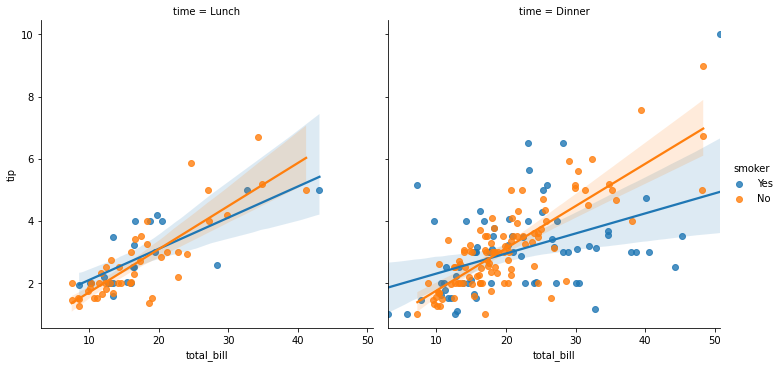

In [5]:
sns.lmplot(x="total_bill",y= "tip",hue="smoker",col="time", data=df );


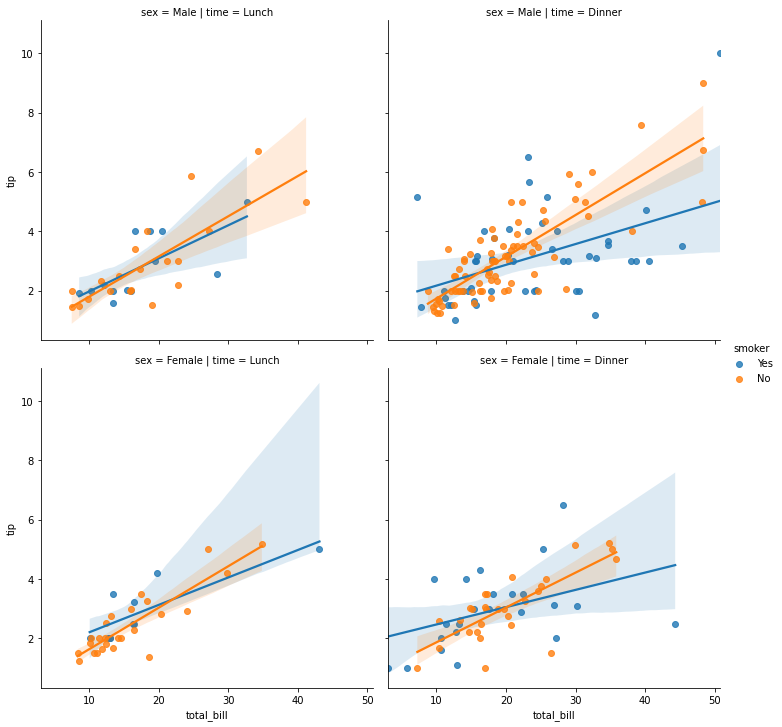

In [6]:
sns.lmplot(x="total_bill",y= "tip",hue="smoker",col="time",row="sex", data=df );


#scatterplot  matrsis

In [7]:
import seaborn as sns
iris=sns.load_dataset("iris")
df=iris.copy()

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


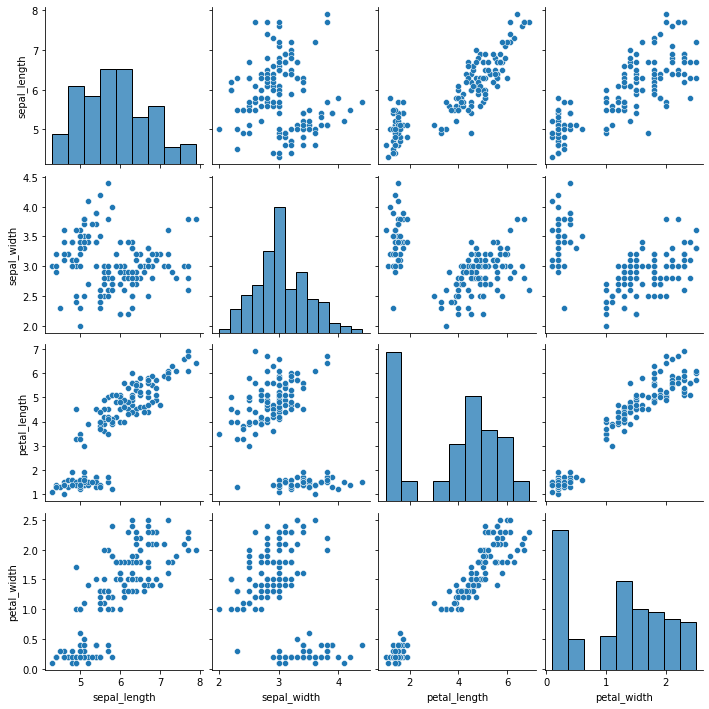

In [9]:
sns.pairplot(df)

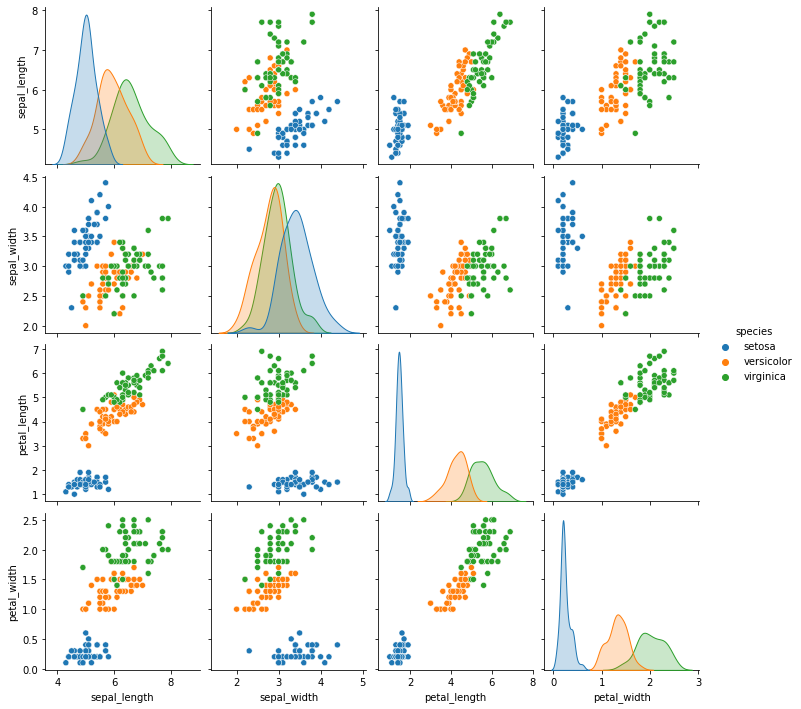

In [11]:
sns.pairplot(df , hue="species")

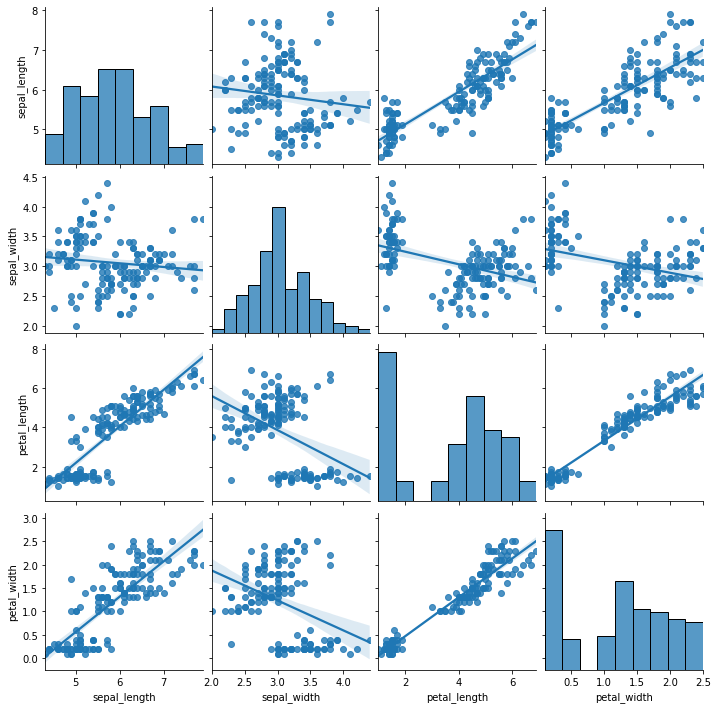

In [13]:
#her grafiğiğe doğru ekleme:
sns.pairplot(df , kind="reg")

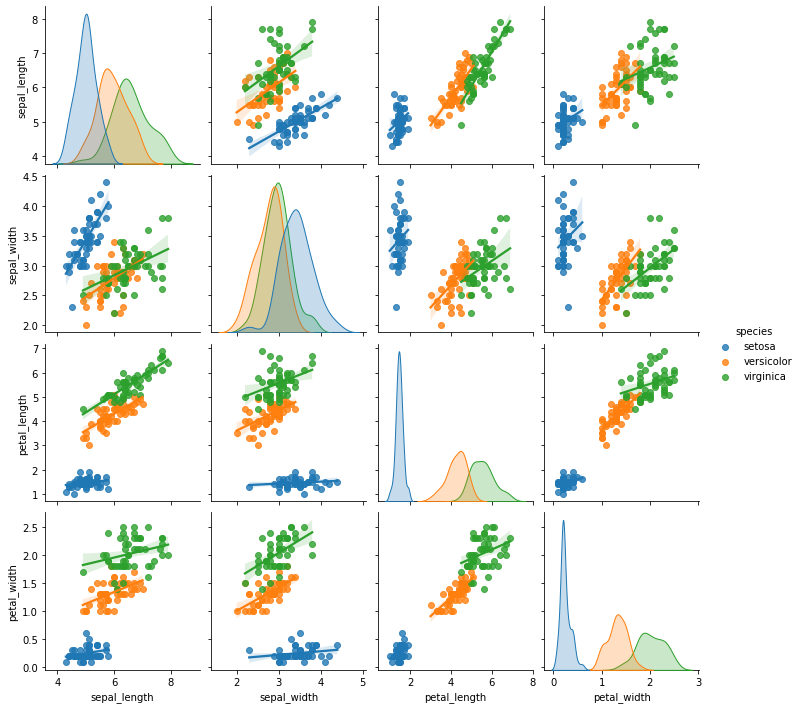

In [14]:
sns.pairplot(df , kind="reg" , hue="species")

#HEAT MAP

In [15]:
import seaborn as sns
flights=sns.load_dataset("flights")
df=flights.copy()

In [16]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [17]:
#sns.heatmap(df);    çalışmaz.yapılandırılması gerekir.boyutlandırılmalı:

In [19]:
df=df.pivot("month" , "year", "passengers");

In [20]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


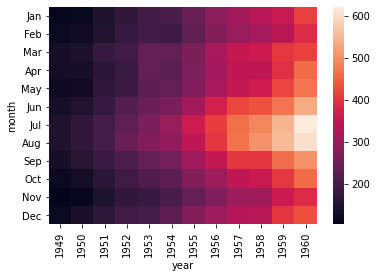

In [21]:
sns.heatmap(df)
#yıllar geçtikçe uçuş artmış
#en fazla uçus haziran temmuz ağustosta fazla

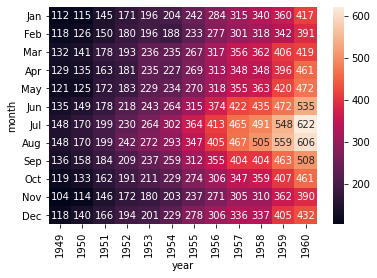

In [22]:
sns.heatmap(df,annot=True,fmt="d");

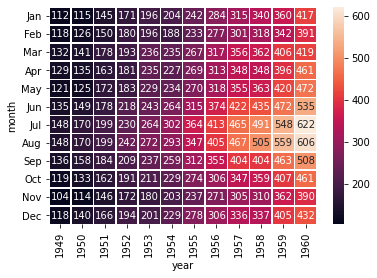

In [23]:
sns.heatmap(df,annot=True,fmt="d", linewidths=0.5);

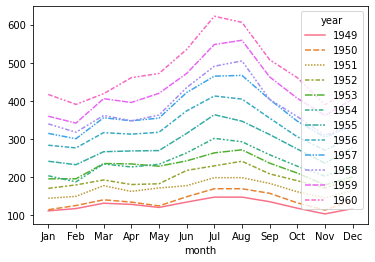

In [26]:
sns.lineplot(data=df);

#Basit zaman seris grafiği:

In [31]:
#kullanacağımız veri seti için bir kütüphaney emodüle itiyazcımı var.önce pip le modülü indircez:
!pip install pandas_datareader
import pandas_datareader as pr

In [33]:
#veriseti: apple in borsadaki değerler:

df= pr.get_data_yahoo("AAPL",start="2016-01-01",end="2019-08-25") 

In [35]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154


In [37]:
kapanıs=df["Close"]

In [38]:
kapanıs.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

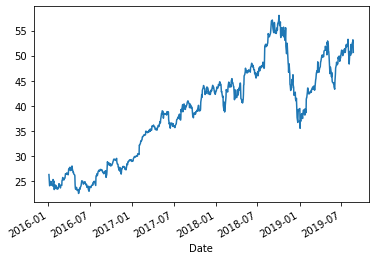

In [39]:
kapanıs.plot()